#**Laboratorio N° 05 - Parte práctica**

*   La evaluación es estrictamente personal.
*   El formato de entrega válido es Lab5_CÓDIGOPUCP.ipynb, donde CÓDIGOPUCP es su código de alumno. De entregar en cualquier otro formato, se penalizará con un descuento de 2 puntos.

##**Pregunta 1** (15 pts)

Implementar el algoritmo presentado a continuación

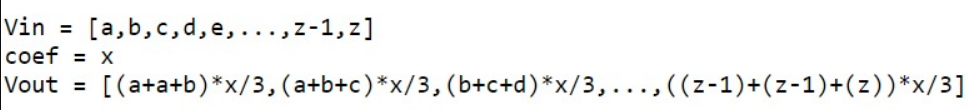

A continuación, se muestran los nombres de las variables a utilizar en el desarrollo del problema:



*   Vin: Arreglo de entrada (FLOAT) con valores generados aleatoriamente entre 0 y 10.
*   N: Tamaño del arreglo de entrada (INT)
*   coef: Coeficiente utilizado (FLOAT). Debe ser un parámetro de entrada y debe asumir coef=0.5 para las pruebas
*   Vout: Arreglo de salida (FLOAT)





1. (1.5 pts) Crear una función en C llamada Algoritmo_C que desarrolle el algoritmo propuesto.

In [1]:
%%file Algoritmo_C.c
void Algoritmo_C(float *Vin,float *Vout,int N,float coef){
    for(int i=0;i<N;i++){
        if(i==0){
            Vout[i]=(Vin[i]+Vin[i]+Vin[i+1])*coef/3;
        }
        else if(i==(N-1)){
            Vout[i]=(Vin[i]+Vin[i]+Vin[i-1])*coef/3;
        }
        else{
            Vout[i]=(Vin[i-1]+Vin[i]+Vin[i+1])*coef/3;
        }
    }
}

Overwriting Algoritmo_C.c


In [2]:
#para generar mi object file
! gcc -c Algoritmo_C.c -o Algoritmo_C.o
#para generar mi shared library
! gcc -shared Algoritmo_C.o -o Algoritmo_C.so

2. (3 pts) Crear una función en ASM llamada Algoritmo_ASM que desarrolle el algoritmo propuesto.


In [3]:
%%file Algoritmo_ASM.asm
    global Algoritmo_ASM
section .text
Algoritmo_ASM:
    ;limpiamos los arreglos a utilizar 
    xorpd xmm9,xmm9 ;registro para el arreglo Vin
    xorpd xmm1,xmm1 ;registro para el arreglo Vout
    xorpd xmm4,xmm4 ;inicializamos a 0
    xorpd xmm5,xmm5 ;inicializamos a 0
    xorpd xmm6,xmm6 ;inicializamos a 0
    xorpd xmm7,xmm7 ;inicializamos a 0
    xor  rax,rax ;sera nuestro contador (i) empieza en 0

condicion:
    cmp rdx,rax ;si nuestro valor de N es menor e igual a i retornamos
    jle done
for_i:
    movss xmm9,[rdi+rax*4] ;movemos al registro el valor de Vin[i]
    mov r8d,3 ;movemos el valor de 3 que sera entre lo que divivamos
    cvtsi2ss xmm8,r8d ;convertimos el 3 a float y lo almacenamos en xmm8
    cmp rax,0 ;comparamos el valor de rax(contador) con 0 , si se cumple saltaremos a la etiqueta condicion_1
    je condicion_1
    
    ;cuando nuestro i=N-1
    dec rdx ;para obtener el N-1
    cmp rax,rdx ;comparemos el valor de i con N-1
    je condicion_2 ; si son iguales saltara a la etiqueta condicion_2

    ;cuando nuestro i=1,2,3,4,5 hasta N-2 
    dec rax ;restamos el valor de i en 1 para obtener el indice (i-1)
    movss xmm4,[rdi+rax*4] ; movemos el valor de Vin[i-1] al registro de xmm4
    add rax,2 ;sumamos 2 al valor de i para obtener el indice (i+1)
    movss xmm5,[rdi+rax*4] ;movemos el valor de Vin[i+1] al registro xmm5
    addss xmm9,xmm4 ;sumamos el valor de Vin[i]+Vin[i-1]
    addss xmm9,xmm5 ;sumamaos al resultado anterior Vin[i+1]
    mulss xmm9,xmm0 ;multiplicamos el resultado anterior por el coeficiente
    divss xmm9,xmm8 ;ahira dividimos el resultado entre 3
    dec rax ;restamos el valor de rax para obtener el indice i para almacenar el resultado anterior en Vout[i]
    movss [rsi+rax*4],xmm9 ; almacenamos el resultado en Vout[i]
    inc rax ;incrementamos el valor de rax para que la cuenta siga 
    jmp condicion ;salto sin condicion 

condicion_1:
    inc rax ;incrementamos el valor de rax que estaba en 0 y ahora será 1
    movss xmm6,[rdi+rax*4] ;movemos el valor del Vin[1] al registro xmm6 
    addss xmm9,xmm9 ;sumamos el valor de xmm9 consigo mismo , recordando que xmm9 es Vin[0]
    addss xmm9,xmm6 ;sumamaos el valor de Vin[0]+Vin[0] con Vin[1]
    mulss xmm9,xmm0 ;multiplicamos el valor de la suma anterior con el coeficiente
    divss xmm9,xmm8 ;divisimos el valor de la multiplicación entre 3
    dec rax ;devolvamoe el valor de rax a 0 
    movss [rsi+rax*4],xmm9 ; almacenamos nuestro resultado en Vout[0]
    inc rax ;incrementamos el valor de rax para la siguiente iteracion 
    jmp condicion ;hacemos un salto sin condición a la etiqueta condicion  

condicion_2:
    ;sabemos que nuestro i=N-1
    inc rdx ;aumento el valor de rdx para que vuelva a la normalidad
    dec rax ;decrementamos el valor de i para obtener el indice Vin[i-1]
    movss xmm7,[rdi+rax*4] ;movemos el valor de Vin[i-1] al registro xmm7
    addss xmm9,xmm9 ; sumamos el valor de Vin[i]+Vin[i]
    addss xmm9,xmm7 ;sumamos el resultado anterior con Vin[i-1]
    mulss xmm9,xmm0 ;multiplico el resultado anterior con el valor del coeficiente 
    divss xmm9,xmm8 ; divido el resultado entre 3
    inc rax ;aumento en 1 el valor de i para obtener el indice Vout[i]
    movss [rsi+rax*4],xmm9
    inc rax; incremento el valor de i para que siga la cuenta
    jmp condicion
    
done:
    ret

Overwriting Algoritmo_ASM.asm


In [4]:
#Para generar mi object file
! nasm -f elf64 Algoritmo_ASM.asm -o Algoritmo_ASM.o
#Para generar mi shared library
! gcc -shared Algoritmo_ASM.o -o Algoritmo_ASM.so

3. (1.5 pts) Crear una función en Python llamada Algoritmo_Py que desarrolle el algoritmo propuesto sin utilizar numpy.

In [17]:
def Algoritmo_Py(Vin,Vout,n,coef):
    for i in range(n):
        if (i==0):
            Vout[i]=(Vin[i]+Vin[i]+Vin[i+1])*coef/3
        elif (i==(n-1)):
            Vout[i]=(Vin[i]+Vin[i]+Vin[i-1])*coef/3
        else:
            Vout[i]=(Vin[i-1]+Vin[i]+Vin[i+1])*coef/3

5. (3 pts) Validar el funcionamiento de las 3 funciones ejecutándolas desde Python para N = 16.

In [18]:
import ctypes
import random
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics

#Tengo mi N=16 para probar las funciones
N=16
#Declaro mi arreglo de entrada 
Vin=np.asarray([random.uniform(0,10) for _ in range(N)],dtype=np.float32)
#Declaro mi arreglo de salida
Vout=np.zeros_like(Vin)
#Declaro mi coeficiente , esta vez se asumirá el valor de 0.5
coef=0.5

#definimos el nombre de la ruta
libfile='./Algoritmo_C.so'

#la libreria cargada
lib=ctypes.CDLL(libfile)

#Argumentos , int-> ctypes.c_int,


#tipos de datos de los argumentos de la función
lib.Algoritmo_C.argtypes=[
    np.ctypeslib.ndpointer(dtype=np.float32),
    np.ctypeslib.ndpointer(dtype=np.float32),
    ctypes.c_int,
    ctypes.c_float
]

#Obtenemos el valor del arreglo Vout gracias a la función en C
lib.Algoritmo_C(Vin,Vout,N,coef)
print('Resultado en C')
print(Vout) #Imprimimos el resultado
#Obtenemos el valor del arreglo Vout gracias a la función en python
print('Resultado en Python')
Algoritmo_Py(Vin,Vout,N,coef)
print(Vout) #Imprimimos el resultado

#definimos el nombre de la ruta
libfile='./Algoritmo_ASM.so'

#la libreria cargada
lib=ctypes.CDLL(libfile)

#Argumentos , int-> ctypes.c_int,


#tipos de datos de los argumentos de la función
lib.Algoritmo_ASM.argtypes=[
    np.ctypeslib.ndpointer(dtype=np.float32),
    np.ctypeslib.ndpointer(dtype=np.float32),
    ctypes.c_int,
    ctypes.c_float
]
lib.Algoritmo_ASM(Vin,Vout,N,coef)
print('Resultado en ASM')
print(Vout)


Resultado en C
[1.3283513  1.5470505  1.9969845  2.5864284  1.9742423  1.4034071
 0.79429245 1.4465599  1.0186152  2.2248042  1.8949181  2.5075245
 1.9734774  1.9779358  2.052468   1.9547445 ]
Resultado en Python
[1.3283513  1.5470505  1.9969845  2.5864284  1.9742423  1.4034071
 0.79429245 1.4465599  1.0186152  2.2248042  1.8949181  2.5075245
 1.9734774  1.9779358  2.052468   1.9547445 ]
Resultado en ASM
[1.3283513  1.5470505  1.9969845  2.5864284  1.9742423  1.4034071
 0.79429245 1.4465599  1.8262419  2.2248042  1.8949181  2.5075245
 1.9734774  1.9779358  2.052468   1.9547445 ]


6. (4 pts) Realizar el análisis temporal de ejecución para los tamaños de matriz N = {16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384}. Debe generar una gráfica con los tiempos de ejecución para cada N analizando las 3 funciones. Considerar que para cada ejecución debe iterar 19 veces y debe tomar el valor más representativo (mediana).

In [22]:
#cantidad de repeticiones
iteraciones=13

#tamaño de los arreglos
Ns=[32,64,128,256,512,1024,2048,4096,8192,16384]

#tiempos de python
lista_Py=[]
#tiempos de C con for
lista_C=[]
#tiempos de ASM
lista_ASM=[]

for n in Ns:
    lista_Pyi=[]
    lista_C_i=[]
    lista_ASMi=[]
    Vin=np.asarray([random.uniform(0,10) for _ in range(n)],dtype=np.float32)
    for j in range(iteraciones):
        #tiempo en python
        t=time.perf_counter()
        Algoritmo_Py(Vin,Vout,n,coef)
        lista_Pyi.append(1e6*(time.perf_counter()-t))

        #tiempo en C bucle for
        t=time.perf_counter()
        lib.Algoritmo_C(Vin,Vout,n,coef)
        lista_C_i.append(1e6*(time.perf_counter()-t))

        #tiempo en asm
        t=time.perf_counter()
        lib.Algoritmo_ASM(Vin,Vout,n,coef)
        lista_ASMi.append(1e6*(time.perf_counter()-t))

    lista_Py.append(statistics.median(lista_Pyi))
    lista_C.append(statistics.median(lista_C_i))
    lista_ASM.append(statistics.median(lista_ASMi))

plt.plot(Ns,lista_C)
plt.plot(Ns,lista_Py)
plt.plot(Ns,lista_ASM)
plt.grid()
plt.xlabel("Tamaño")
plt.ylabel("Tiempo [us]")
plt.legend({"Tiempo C", "Tiempo ASM"})
plt.show()



AttributeError: ./Algoritmo_ASM.so: undefined symbol: Algoritmo_C

7. (1 pts) ¿Qué función presenta el mejor rendimiento? ¿Por qué? Justifique su respuesta.

8. (1 pts) Explicar el impacto de la memoria caché en sus resultados